In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
df = pd.read_csv("/content/50_Startups(1).csv")
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df=df.rename({'R&D Spend':'RDSpend','Administration':'Administration','Marketing Spend':'MarketingSpend'},axis='columns')
df.head(2)

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [ ]:
df.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Building the model

In [ ]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~MarketingSpend+Administration+RDSpend',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        13:34:57   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.params

Intercept         50122.192990
MarketingSpend        0.027228
Administration       -0.026816
RDSpend               0.805715
dtype: float64

In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
MarketingSpend     1.655077
Administration    -0.525507
RDSpend           17.846374
dtype: float64 
 Intercept         1.057379e-09
MarketingSpend    1.047168e-01
Administration    6.017551e-01
RDSpend           2.634968e-22
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [ ]:
ml_v=smf.ols('Profit~MarketingSpend',df).fit()  
print(ml_v.tvalues,'\n', ml_v.pvalues)  

In [ ]:
ml_v=smf.ols('Profit~Administration',df).fit()  
print(ml_v.tvalues,'\n', ml_v.p

In [ ]:
ml_v=smf.ols('Profit~RDSpend',df).fit()  
print(ml_v.tvalues,'\n', ml_v.pvalues) 

# Calculating VIF

In [ ]:
rsq_Marketing_spend = smf.ols('MarketingSpend~Administration+RDSpend',df).fit().rsquared 
vif_Marketing_spend = 1/(1-rsq_Marketing_spend)
vif_Marketing_spend

2.3267732905308773

In [ ]:
rsq_Administration = smf.ols('Administration~RDSpend+MarketingSpend',df).fit().rsquared 
vif_Administration = 1/(1-rsq_Administration)
vif_Administration

1.1750910070550453

In [ ]:
rsq_RD_spend = smf.ols('RDSpend~MarketingSpend+Administration',df).fit().rsquared 
vif_RD_spend = 1/(1-rsq_RD_spend)
vif_RD_spend

2.4689030699947017

In [ ]:
d1 = {'Variables':['RDSpend','MarketingSpend','Administration'],'VIF':[vif_RD_spend,vif_Marketing_spend,vif_Administration]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDSpend,2.468903
1,MarketingSpend,2.326773
2,Administration,1.175091


## Residual Analysis

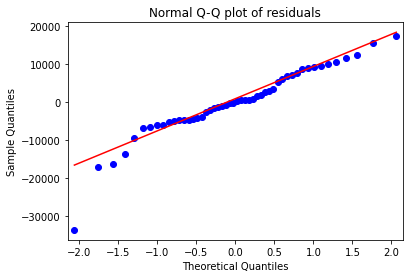

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

## Residual Plot for Homoscedasticity


In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

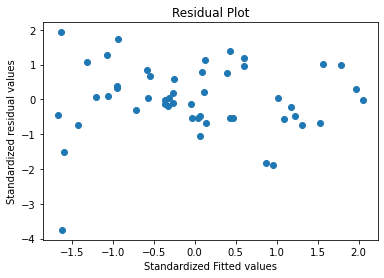

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

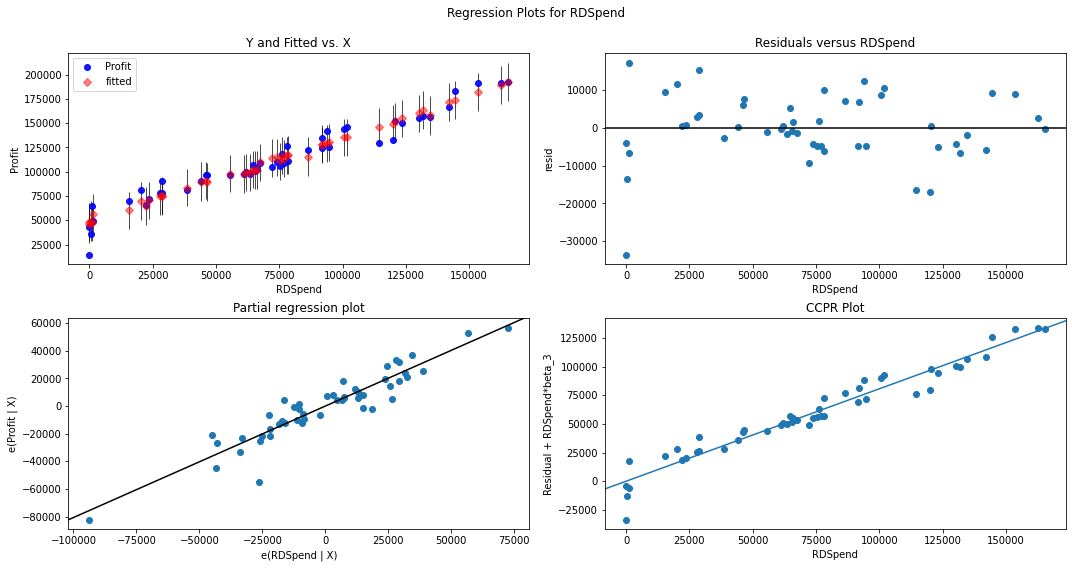

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

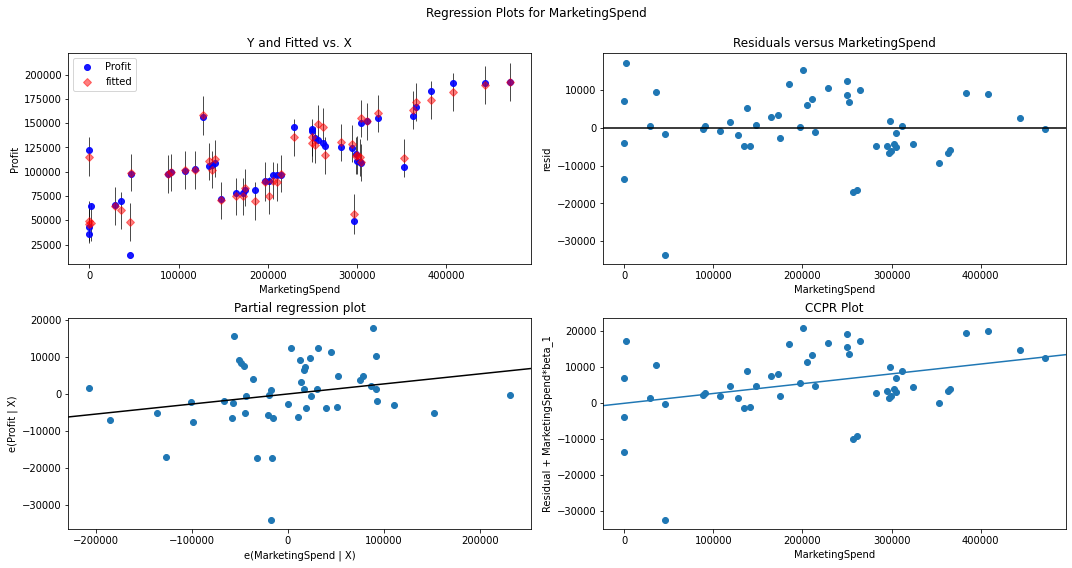

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

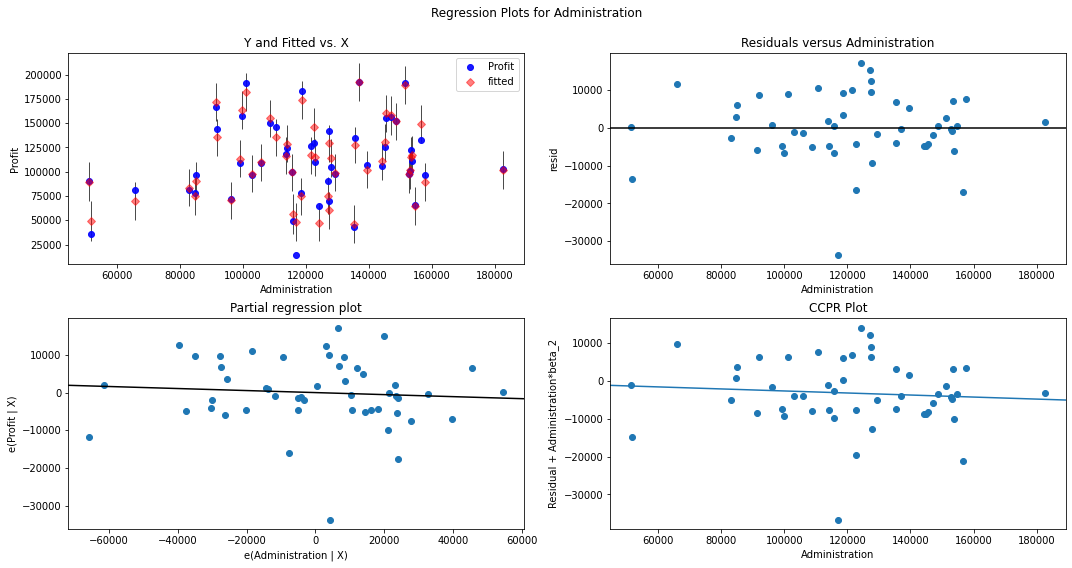

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

## Cook’s Distance


In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


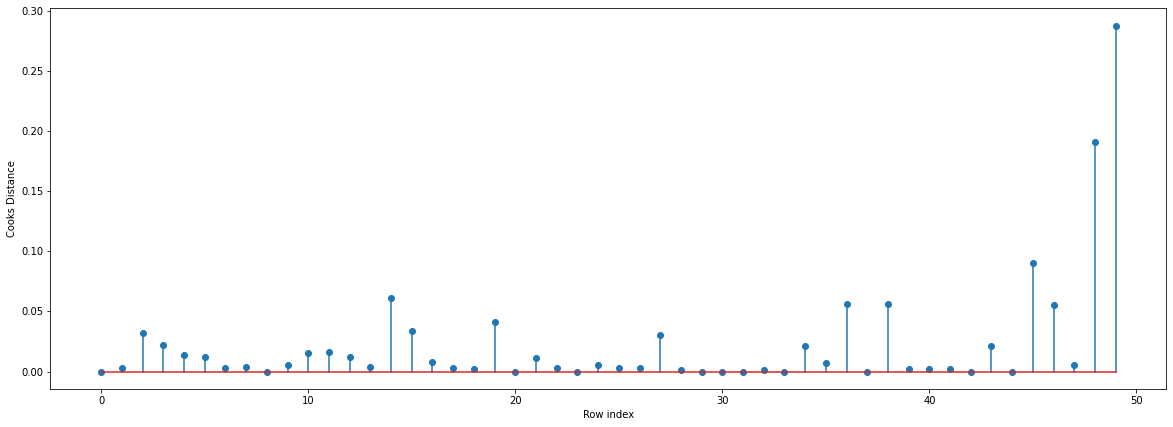

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543269)

## High Influence points


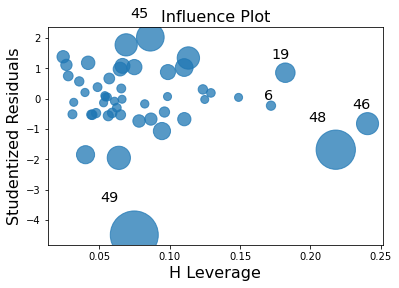

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k =df.shape[1]
n =df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.36

In [ ]:
final_ml= smf.ols('Profit~MarketingSpend+Administration+RDSpend',data = df).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        13:44:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
RDSpend            0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
(final_ml.rsquared,final_ml.aic)

(0.9507459940683246, 1058.7714985998055)

In [ ]:
df1=pd.DataFrame({'MarketingSpend':43200,"Administration":232005,"RDSpend":114050},index=[1])

In [ ]:
final_ml.predict(df1)

1    136968.808085
dtype: float64

In [ ]:
final_ml.predict(df.iloc[0:5,])

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

In [ ]:
pred_y = final_ml.predict(df)
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111
